In [37]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

In [7]:
df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [14]:
X = df[['humidity', 'windspeed', 'windbearing', 'pressure']]
Y = df['temperature']
X = sm.add_constant(X)

In [15]:
results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:36:45   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528538


Check for validity of assumption 2: expected error = 0

In [20]:
X = df[['humidity', 'windspeed', 'windbearing', 'pressure']]
predictions = lrm.predict(X)
errors = Y - predictions
print(np.mean(errors))

#the average of the expected errors is nearly 0

-4.62040998070288e-16


Check for assumption 3: homoscedastity


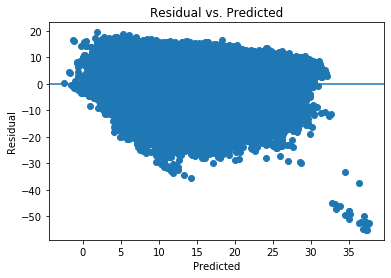

In [21]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [24]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print(bart_stats)
print(lev_stats)

BartlettResult(statistic=2464.8446568674854, pvalue=0.0)
LeveneResult(statistic=2321.2401008574006, pvalue=0.0)


The model fails the 3rd assumption

check for assumption 4: low multicollinearity 

In [40]:
X.corr()

,humidity,windspeed,windbearing,pressure
humidity,1.000000,-0.224951,0.000735,0.005454
windspeed,-0.224951,1.000000,0.103822,-0.049263
windbearing,0.000735,0.103822,1.000000,-0.011651
pressure,0.005454,-0.049263,-0.011651,1.000000


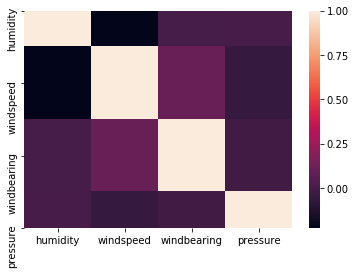

In [39]:
sns.heatmap(X.corr())

the features are weakly correlated with eachother. it passes this assumption

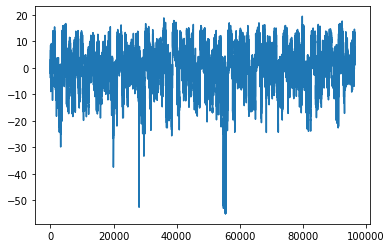

In [42]:
plt.plot(errors)

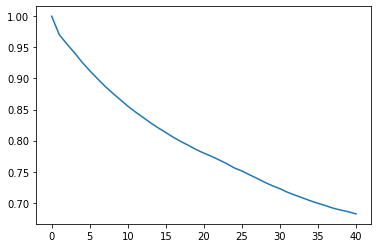

[1.         0.97035124 0.9553087  0.94116457 0.92603952 0.91242042
 0.89979506 0.887476   0.87647    0.86599514 0.85549583 0.84608609
 0.83739718 0.82848643 0.82047967 0.81292243 0.80525289 0.79838646
 0.79214658 0.78550952 0.77983216 0.77468981 0.76896947 0.76297119
 0.75602989 0.75115273 0.74498537 0.73918421 0.73287454 0.72747751
 0.7226405  0.71684414 0.71221382 0.70769778 0.70315359 0.69920983
 0.69536626 0.69129107 0.68822196 0.68548871 0.68206578]


In [44]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data)
plt.show()
print(acf_data)

the model fails this assumption. the errors are highly correlated with one another.

In [46]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

In [47]:
print(jb_stats)
print(norm_stats)

(3793.296735252357, 0.0)
NormaltestResult(statistic=3375.4323076995743, pvalue=0.0)


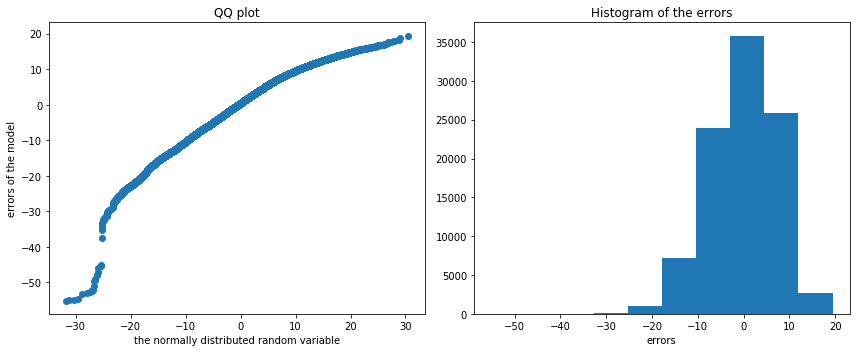

In [48]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [53]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [54]:
numeric_columns = df.select_dtypes(['int64', 'float64']).columns
np.abs(df[numeric_columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)


saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

In [55]:
df.housestyle = df.housestyle.apply(str.strip)

for i in range (0, len(df.housestyle)):
        if df.housestyle[i] == '1.5Fin':
            df.housestyle[i] = 0
        elif df.housestyle[i] == '1.5Unf':
            df.housestyle[i] = 1
        elif df.housestyle[i] == '1Story':
            df.housestyle[i] = 2
        elif df.housestyle[i] == '2.5Fin':
            df.housestyle[i] = 3
        elif df.housestyle[i] == '2.5Unf':
            df.housestyle[i] = 4
        elif df.housestyle[i] == '2Story':
            df.housestyle[i] = 5
        elif df.housestyle[i] == 'SFoyer':
            df.housestyle[i] = 6
        elif df.housestyle[i] == 'SLv1':
            df.housestyle[i] = 7
        else:
            df.housestyle[i] = 8
            
df["is_street_paved"] = pd.get_dummies(df.street, drop_first=True)

df.extercond = df.extercond.apply(str.strip)
np.unique(df.extercond)

for i in range (0, len(df.extercond)):
    if df.extercond[i] == 'Ex':
        df.extercond[i] = 0
    elif df.extercond[i] == 'Fa':
        df.extercond[i] = 1
    elif df.extercond[i] == 'Gd':
        df.extercond[i] = 2
    elif df.extercond[i] == 'Po':
        df.extercond[i] = 3
    else:
        df.extercond[i] = 4

df.foundation = df.foundation.apply(str.strip)
np.unique(df.foundation)

for i in range (0, len(df.foundation)):
    if df.foundation[i] == 'BrkTil':
        df.foundation[i] = 0
    elif df.foundation[i] == 'CBlock':
        df.foundation[i] = 1
    elif df.foundation[i] == 'PConc':
        df.foundation[i] = 2
    elif df.foundation[i] == 'Slab':
        df.foundation[i] = 3
    elif df.foundation[i] == 'Stone':
        df.foundation[i] = 4
    else:
        df.foundation[i] = 5
        
df.functional = df.functional.apply(str.strip)
np.unique(df.functional)

for i in range (0, len(df.functional)):
    if df.functional[i] == 'Typ':
        df.functional[i] = 0
    elif df.functional[i] == 'Min1':
        df.functional[i] = 1
    elif df.functional[i] == 'Min2':
        df.functional[i] = 2
    elif df.functional[i] == 'Mod':
        df.functional[i] = 3
    elif df.functional[i] == 'Maj1':
        df.functional[i] = 4
    elif df.functional[i] == 'Maj2':
        df.functional[i] = 5
    elif df.functional[i] == 'Sev':
        df.functional[i] = 6
    else:
        df.functional[i] = 7
        


In [75]:
df.housestyle = df['housestyle'].astype(str).astype(int)
X = df[['housestyle', 'is_street_paved', 'overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

ValueError: The indices for endog and exog are not aligned

In [73]:
df.totalbsmtsf.dtypes

dtype('int64')